<a href="https://colab.research.google.com/github/Bhumika247/ChicagoCrimeTrend/blob/main/Chicago_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
mydata = pd.read_csv('drive/MyDrive/Colab Notebooks/crimedataSmaller.csv')

In [ ]:
mydata

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,FALSE,1111,11,28,25,04B,1144606,1903566,2015,2/10/2018 15:50,41.891399,-87.74438457,"(41.891398861, -87.744384567)"
1,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,FALSE,725,7,15,67,26,1166468,1860715,2015,2/10/2018 15:50,41.773372,-87.66531947,"(41.773371528, -87.665319468)"
2,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,TRUE,222,2,4,39,08B,1185075,1875622,2015,2/10/2018 15:50,41.813861,-87.59664284,"(41.81386068, -87.596642837)"
3,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,FALSE,225,2,3,40,08B,1178033,1870804,2015,2/10/2018 15:50,41.800802,-87.62261934,"(41.800802415, -87.622619343)"
4,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,FALSE,1113,11,28,25,3,1144920,1898709,2015,2/10/2018 15:50,41.878065,-87.74335401,"(41.878064761, -87.743354013)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,009XX W DICKENS AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,FALSE,1812,18,43,7,14,1169489,1914149,2015,2/10/2018 15:50,41.919934,-87.65269275,"(41.919934216, -87.652692746)"
495,004XX S FRANKLIN ST,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,FALSE,122,1,2,32,6,1174386,1898413,2015,2/10/2018 15:50,41.876646,-87.63517102,"(41.876645737, -87.635171022)"
496,035XX S WESTERN BLVD,460,BATTERY,SIMPLE,SIDEWALK,False,FALSE,911,9,12,59,08B,1161093,1881324,2015,2/10/2018 15:50,41.830038,-87.68445274,"(41.830038123, -87.684452738)"
497,011XX W OHIO ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,FALSE,1214,12,27,24,5,1168750,1904033,2015,2/10/2018 15:50,41.892191,-87.65570155,"(41.892191358, -87.65570155)"


In [ ]:
mydata = mydata[mydata["Domestic"] !='1533']

In [ ]:
mydata

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,FALSE,1111,11,28,25,04B,1144606,1903566,2015,2/10/2018 15:50,41.891399,-87.74438457,"(41.891398861, -87.744384567)"
1,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,FALSE,725,7,15,67,26,1166468,1860715,2015,2/10/2018 15:50,41.773372,-87.66531947,"(41.773371528, -87.665319468)"
2,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,TRUE,222,2,4,39,08B,1185075,1875622,2015,2/10/2018 15:50,41.813861,-87.59664284,"(41.81386068, -87.596642837)"
3,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,FALSE,225,2,3,40,08B,1178033,1870804,2015,2/10/2018 15:50,41.800802,-87.62261934,"(41.800802415, -87.622619343)"
4,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,FALSE,1113,11,28,25,3,1144920,1898709,2015,2/10/2018 15:50,41.878065,-87.74335401,"(41.878064761, -87.743354013)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,009XX W DICKENS AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,FALSE,1812,18,43,7,14,1169489,1914149,2015,2/10/2018 15:50,41.919934,-87.65269275,"(41.919934216, -87.652692746)"
495,004XX S FRANKLIN ST,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,FALSE,122,1,2,32,6,1174386,1898413,2015,2/10/2018 15:50,41.876646,-87.63517102,"(41.876645737, -87.635171022)"
496,035XX S WESTERN BLVD,460,BATTERY,SIMPLE,SIDEWALK,False,FALSE,911,9,12,59,08B,1161093,1881324,2015,2/10/2018 15:50,41.830038,-87.68445274,"(41.830038123, -87.684452738)"
497,011XX W OHIO ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,FALSE,1214,12,27,24,5,1168750,1904033,2015,2/10/2018 15:50,41.892191,-87.65570155,"(41.892191358, -87.65570155)"


In [ ]:
col_drop = ['Updated On','IUCR','Description', 'FBI Code', 'X Coordinate','Y Coordinate', 'Location' , 'Year', 'Block','Latitude','Longitude']
mydata.drop(col_drop,axis = 1, inplace = True)

<ipython-input-8-3769fb0a2e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata.drop(col_drop,axis = 1, inplace = True)


In [ ]:
mydata.head()

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,BATTERY,STREET,False,FALSE,1111,11,28,25
1,OTHER OFFENSE,STREET,True,FALSE,725,7,15,67
2,BATTERY,APARTMENT,False,TRUE,222,2,4,39
3,BATTERY,APARTMENT,False,FALSE,225,2,3,40
4,ROBBERY,SIDEWALK,False,FALSE,1113,11,28,25


In [ ]:
mydata['Arrest'] = [0 if x == False else 1 for x in mydata['Arrest']]

<ipython-input-10-ca541fcf27d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Arrest'] = [0 if x == False else 1 for x in mydata['Arrest']]


In [ ]:
x=mydata.select_dtypes('O')

In [ ]:
x1 = mydata
for col in x.columns:
  lb = LabelEncoder()
  x1[col] = lb.fit_transform(x[col].values)

<ipython-input-12-9d091cc2d2ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[col] = lb.fit_transform(x[col].values)
<ipython-input-12-9d091cc2d2ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[col] = lb.fit_transform(x[col].values)
<ipython-input-12-9d091cc2d2ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
x1.dtypes

Primary Type            int64
Location Description    int64
Arrest                  int64
Domestic                int64
Beat                    int64
District                int64
Ward                    int64
Community Area          int64
dtype: object

In [ ]:
x1

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,2,40,0,0,1111,11,28,25
1,14,40,1,0,725,7,15,67
2,2,3,0,1,222,2,4,39
3,2,3,0,0,225,2,3,40
4,17,38,0,0,1113,11,28,25
...,...,...,...,...,...,...,...,...
494,5,40,0,0,1812,18,43,7
495,19,28,0,0,122,1,2,32
496,2,38,0,0,911,9,12,59
497,3,31,0,0,1214,12,27,24


In [ ]:
#Feature Selection
X = x1.drop('Domestic', axis =1)

In [ ]:
feat_labels = X.columns

In [ ]:
y = x1['Domestic'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
clf = RandomForestClassifier(n_estimators = 150, max_depth=7, random_state = 0)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=0)

In [ ]:
#finding which feature is important
for feature in zip(feat_labels, clf.feature_importances_):
  print(feature)

('Primary Type', 0.25347661494413903)
('Location Description', 0.18186145430792458)
('Arrest', 0.034614836074927664)
('Beat', 0.16695080757512443)
('District', 0.0883318563190807)
('Ward', 0.12553054546029246)
('Community Area', 0.14923388531851117)


In [ ]:
sfm = SelectFromModel(clf, threshold = 0.08)
#train the selector
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=7, n_estimators=150,
                                                 random_state=0),
                threshold=0.08)

In [ ]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [ ]:
clf_important = RandomForestClassifier(n_estimators = 150, max_depth= 7, random_state = 5)
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=5)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.88

In [ ]:
y_important_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)

0.8933333333333333

In [ ]:
confusion_matrix(y_test,y_important_pred)

array([[127,   5],
       [ 11,   7]])

<Axes: >

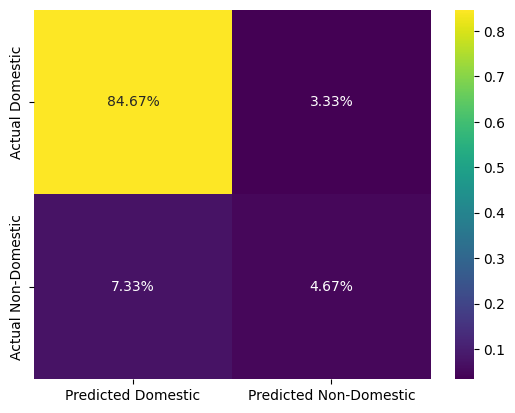

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true,y_pred):
  s = np.sum(confusion_matrix(y_true,y_pred))
  labels = ['Domestic','Non-Domestic']
  columns = [f'Predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,y_pred)/s,
                       columns = columns,
                       index=index)
  return sns.heatmap(table,annot =True, fmt='.2%', cmap ='viridis')

plot_confusion_matrix(y_test,y_important_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_important_pred))
rf = classification_report(y_test,y_important_pred)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       132
           1       0.58      0.39      0.47        18

    accuracy                           0.89       150
   macro avg       0.75      0.68      0.70       150
weighted avg       0.88      0.89      0.88       150



In [ ]:
#KNN
KC = KNeighborsClassifier(n_neighbors=2)
KC.fit(X_important_train,y_train)
y_pred_KC = KC.predict(X_important_test)
confusion_matrix(y_test,y_pred_KC)

array([[124,   8],
       [ 16,   2]])

In [ ]:
accuracy_score(y_test,y_pred_KC)

0.84

<Axes: >

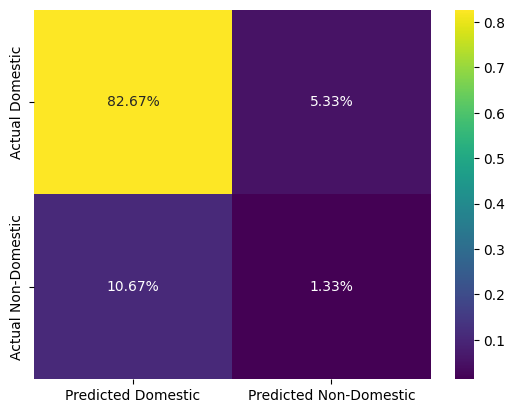

In [ ]:
plot_confusion_matrix(y_test,y_pred_KC)

In [ ]:
print(classification_report(y_test,y_pred_KC))
knn = classification_report(y_test,y_pred_KC)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       132
           1       0.20      0.11      0.14        18

    accuracy                           0.84       150
   macro avg       0.54      0.53      0.53       150
weighted avg       0.80      0.84      0.82       150



In [ ]:
#SVM
svmcf = SVC()
svmcf.fit(X_important_train,y_train)
y_pred_svmcf = svmcf.predict(X_important_test)
confusion_matrix(y_test,y_pred_svmcf)

array([[132,   0],
       [ 18,   0]])

In [ ]:
accuracy_score(y_test,y_pred_svmcf)

0.88

<Axes: >

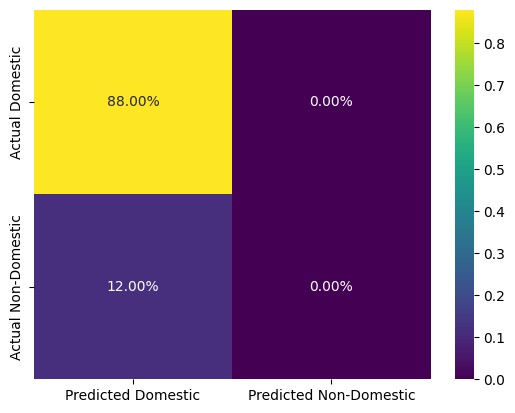

In [ ]:
plot_confusion_matrix(y_test,y_pred_svmcf)

In [ ]:
print(classification_report(y_test,y_pred_svmcf))
svm = classification_report(y_test,y_pred_svmcf)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       132
           1       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
models = {"Random Forest": rf,
          "KNN" : knn,
          "SVM" : svm}

for i,v in models.items():
  print(i+"\n"+ v+"\n")



Random Forest
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       132
           1       0.58      0.39      0.47        18

    accuracy                           0.89       150
   macro avg       0.75      0.68      0.70       150
weighted avg       0.88      0.89      0.88       150


KNN
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       132
           1       0.20      0.11      0.14        18

    accuracy                           0.84       150
   macro avg       0.54      0.53      0.53       150
weighted avg       0.80      0.84      0.82       150


SVM
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       132
           1       0.00      0.00      0.00        18

    accuracy                           0.88       150
   macro avg       0.44      0.50      0.47       150
weighted avg       0.77      0.88      0.82       